In [1]:
#This code imports necessary libraries for data analysis and visualization, suppresses warnings, and imports preprocessing tools from scikit-learn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
#reading csv file
df = pd.read_csv("mushroom_cleaned.csv")

In [3]:
#shows first five columns
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
#shows last five columns
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [5]:
#Displays the count of missing values for each column in the DataFrame
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [6]:
# check for duplicate values
df.duplicated().sum()

303

In [7]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
#checking for statistical measures of columns
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000
mean,568.629178,4.005900,2.142857,7.344599,0.752102,1057.000633,8.454013,0.952322,0.546639
std,360.384461,2.165188,2.232546,3.190447,0.645987,780.263033,3.235507,0.303795,0.497825
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,290.000000,2.000000,0.000000,5.000000,0.270146,430.000000,6.000000,0.888450,0.000000
50%,528.000000,5.000000,1.000000,8.000000,0.589316,929.000000,11.000000,0.943195,1.000000
75%,782.000000,6.000000,4.000000,10.000000,1.046900,1527.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [10]:
#shows a random single row
df.sample()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
35592,923,6,0,5,1.993048,1508,6,0.943195,1


In [11]:
df.shape

(53732, 9)

In [12]:
#Overview of the DataFrame's structure and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53732 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     53732 non-null  int64  
 1   cap-shape        53732 non-null  int64  
 2   gill-attachment  53732 non-null  int64  
 3   gill-color       53732 non-null  int64  
 4   stem-height      53732 non-null  float64
 5   stem-width       53732 non-null  int64  
 6   stem-color       53732 non-null  int64  
 7   season           53732 non-null  float64
 8   class            53732 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 4.1 MB


In [13]:
#counting 'target' column
df['class'].value_counts()

class
1    29372
0    24360
Name: count, dtype: int64

# DATA VISUALIZATION

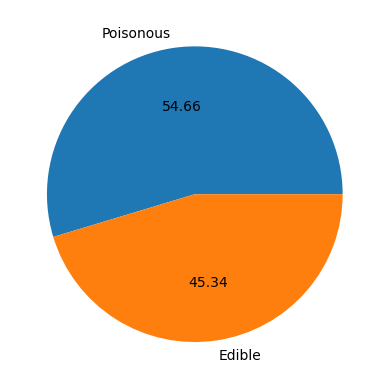

In [14]:
#pie graph
plt.pie(df['class'].value_counts(), labels=['Poisonous','Edible'],autopct="%0.2f")
plt.show()

In [15]:
#calculating the correlation matrix for selected columns
df_corr = df[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height','stem-width','stem-color','season','class']].dropna().corr()

<Axes: >

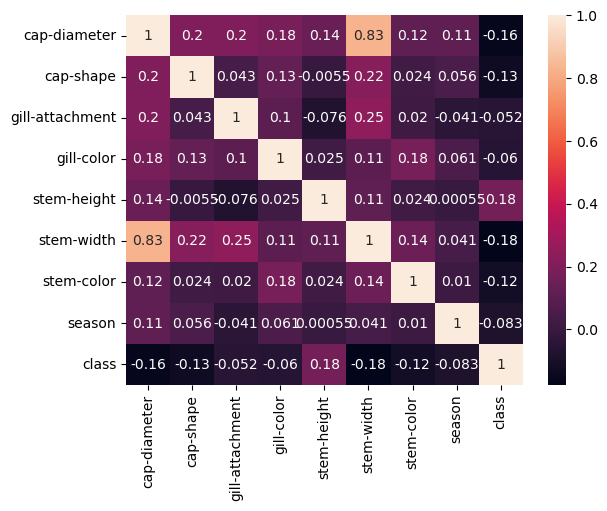

In [16]:
sns.heatmap(df_corr, annot=True)

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'gill-attachment'}>],
       [<Axes: title={'center': 'gill-color'}>,
        <Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

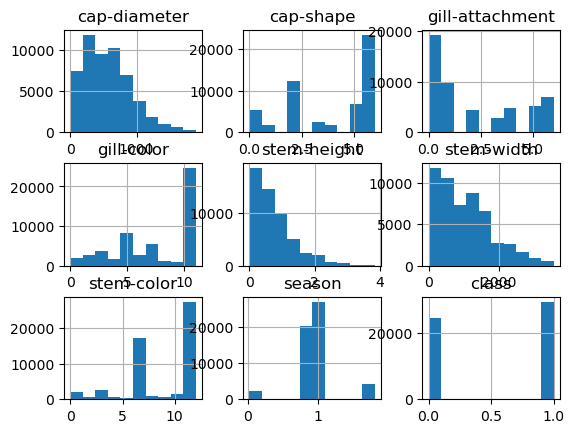

In [17]:
df.hist()

# MODEL BUILDING

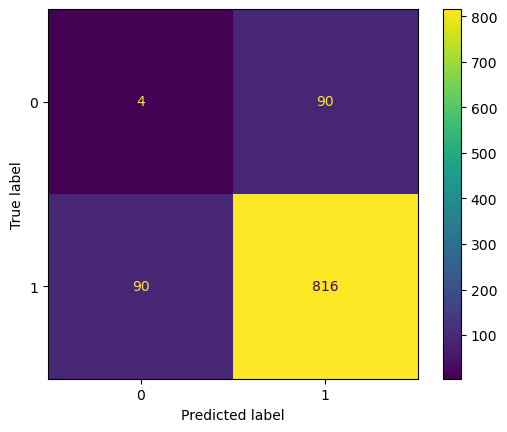

In [18]:
#randomly generating binary actual and predicted values, constructs a confusion matrix, and then displays it using scikit-learn's ConfusionMatrixDisplay class.
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [19]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC  # Example classifier, replace with your actual classifier

# Assuming you have X_train, X_test, y_train, y_test from train_test_split
# Initialize your classifier (replace SVC with your actual classifier)
clf = SVC()

# Train your classifier on the training data
clf.fit(X_train, y_train)

# Obtain predictions on the test set
y_pred = clf.predict(X_test)

# Calculate true labels (assuming you have them)
y_true = y_test  # Assuming y_test contains true labels for the test set

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract true negatives (TN) and false positives (FP) from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)


Accuracy: 0.6715362426723737
Precision: 0.6921376697189769
Recall: 0.7350771294433266
F1 Score: 0.7129614571475036
Specificity: 0.5923060840476688


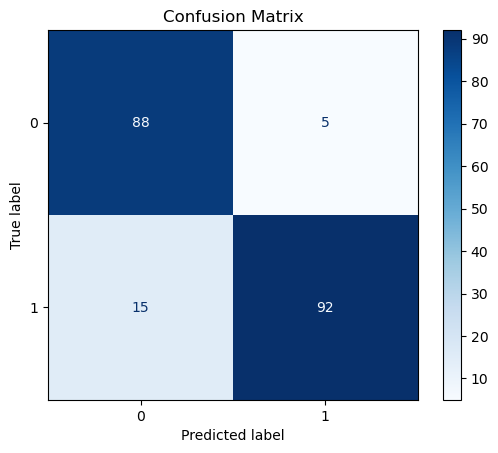

True Negatives (TN): 88
False Positives (FP): 5
False Negatives (FN): 15
True Positives (TP): 92


In [23]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
print(f'True Positives (TP): {tp}')

In [24]:
# Given values

# TN = 88   True Negatives
# FP = 5    False Positives
# FN = 15   False Negatives
# TP = 92   True Positives

# Calculate accuracy
# accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
# precision = TP / (TP + FP)

# Calculate recall
# recall = TP / (TP + FN)

# Calculate specificity
# specificity = TN / (TN + FP)

# Calculate F1 Score
# f1_score = 2 * (precision * recall) / (precision + recall)

# The results:
# Accuracy = 0.9
# Precision = 0.948
# Recall = 0.860
# Specificity = 0.946
# F1 Score = 0.903

In [25]:
#Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
#Evaluate the Model
score = model.score(X_test, y_test)
print(f'Model Accuracy: {score * 100:.2f}%')

Model Accuracy: 90.00%


In [27]:
#Save the Model and Label Encoders
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)